# Waldo Face

## Problem

In order to implement a face detection of Waldo using a signal processing method, it is necessary to construct sample images of Waldo's head that are at the same scale as the image in which we will later detect his head.

## Imports

In [41]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from PIL import Image

## Getting started with image analysis using Python

First, let's get familiar with basic operations on a Waldo's face image.

### Loading and displaying image

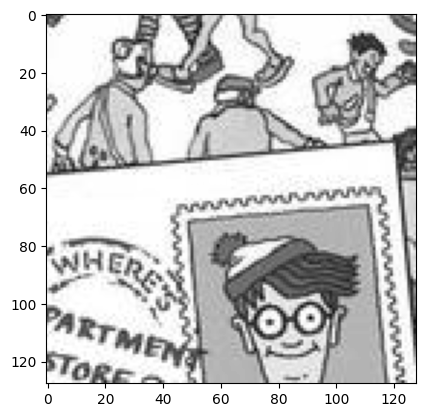

In [42]:
# Load the images into Python
waldo = Image.open('images/waldo_example.jpg')
# Convert the image to grayscale
waldo = waldo.convert('L')
# Display the image
plt.imshow(waldo, cmap="gray")

## Building the sample

The objective is to construct a face sample with the same pixel dimensions along the x and y axes as it appears in the larger image from which it will need to be detected. So first, let's count approximately the length in pixel of a typical Waldo face inside a medium sized image.

Image dimensions : 1298 x 951


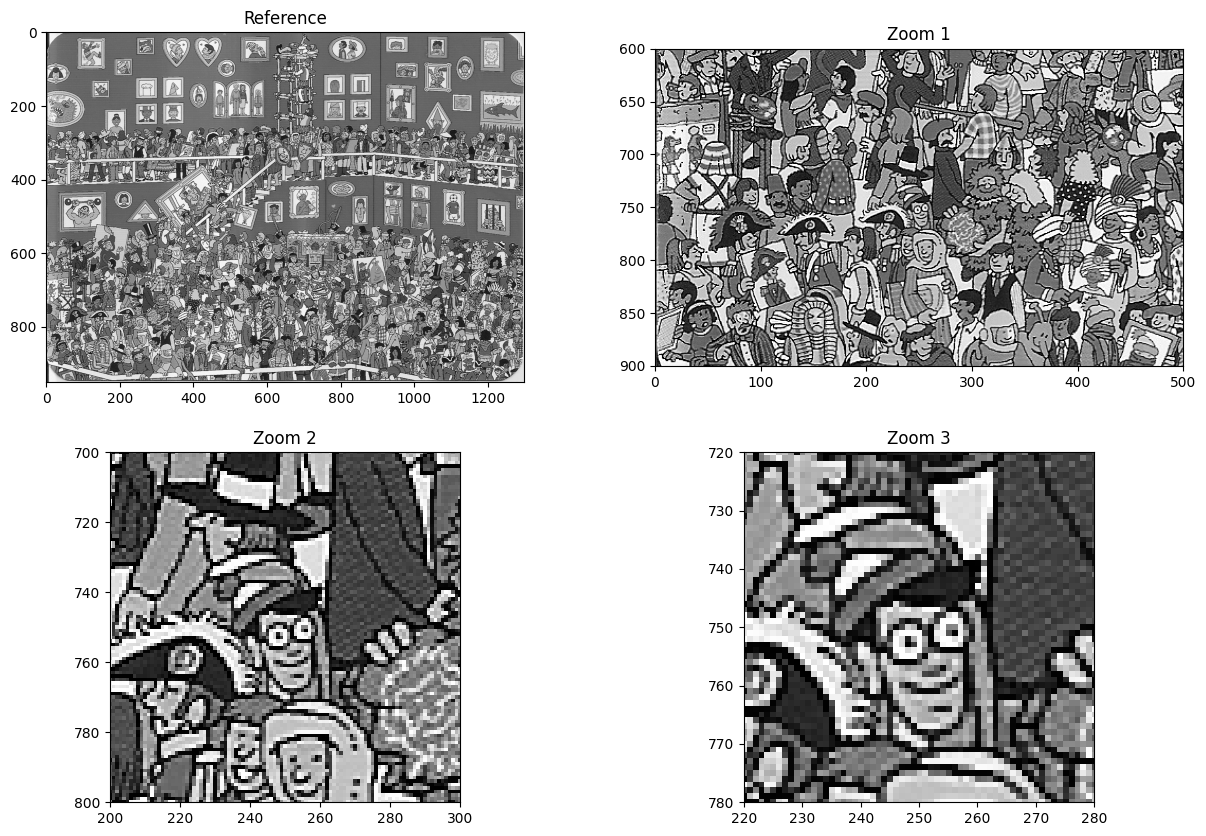

In [43]:
# Load the images into Python
ref_image = Image.open('images/ref_image.jpg')
# Convert the image to grayscale
ref_image = ref_image.convert('L')
# Print the length of the image
width, height = ref_image.size
print("Image dimensions :", width, "x", height)

# Display the figure
plt.figure(figsize=(15, 10))

plt.subplot(2, 2, 1)
plt.imshow(ref_image, cmap="gray")
plt.title("Reference")

plt.subplot(2, 2, 2)
plt.imshow(ref_image, cmap="gray")
plt.title("Zoom 1")
plt.xlim(0, 500)
plt.ylim(900, 600)

plt.subplot(2, 2, 3)
plt.imshow(ref_image, cmap="gray")
plt.title("Zoom 2")
plt.xlim(200, 300)
plt.ylim(800, 700)

plt.subplot(2, 2, 4)
plt.imshow(ref_image, cmap="gray")
plt.title("Zoom 3")
plt.xlim(220, 280)
plt.ylim(780, 720)

zoom1_cropped = ref_image.crop((0, 600, 500, 900))
zoom1_cropped.save('images/waldo_zoom1.jpg')

# Crop the region for Zoom 2
zoom2_cropped = ref_image.crop((200, 700, 300, 800))
zoom2_cropped.save('images/waldo_zoom2.jpg')

Let's save the zoomed image and draw a red square around it to compute the pixel size of Waldo's face

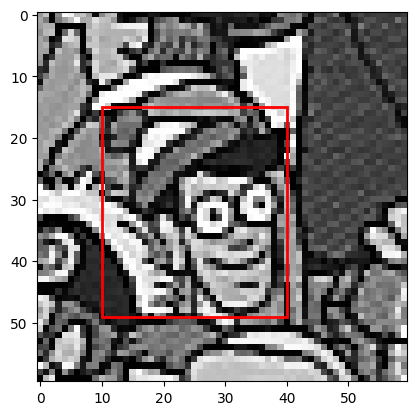

Image dimensions : 30 x 34


In [44]:
# Define the zoomed region
x1, y1, x2, y2 = 220, 720, 280, 780
zoomed_face = ref_image.crop((x1, y1, x2, y2))
# Define the coordinates of the red square
rect_x1, rect_y1, rect_x2, rect_y2 = 10, 15, 40, 49

# Create figure and axes
fig, ax = plt.subplots()

# Display the zoomed face image
ax.imshow(zoomed_face, cmap="gray")
rect = patches.Rectangle((rect_x1, rect_y1), rect_x2 - rect_x1, rect_y2 - rect_y1, linewidth=2, edgecolor='r', facecolor='none')
ax.add_patch(rect)
plt.show()

# Print the actual size of the face
rect_width, rect_height = abs(rect_x2-rect_x1), abs(rect_y2-rect_y1)
print("Image dimensions :", rect_width, "x", rect_height)


Let's save the final zoom of Waldo's face

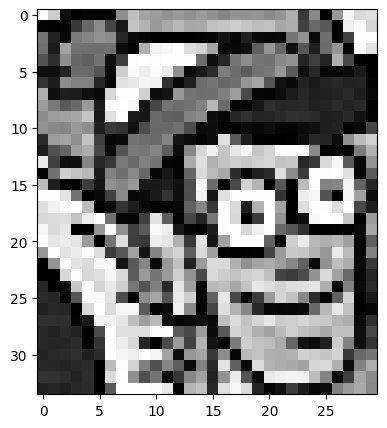

In [45]:
# Crop the exact region
face_x1, face_y1, face_x2, face_y2 = x1+rect_x1, y1+rect_y1, x1+rect_x2, y1+rect_y2
waldo_face = ref_image.crop((face_x1, face_y1, face_x2, face_y2))

# Display result
plt.figure(figsize=(5, 5))
plt.imshow(waldo_face, cmap="gray")

# Save the cropped face to a file
waldo_face.save('images/waldo_zoom3.jpg')


## Let's outline his face !

Why do we need to outline his face ?

- The image of his face will be reusable
- To further highlight the maximum intercorrelation between the two images

How do we do that ?

There are many solutions, such as doing it manually on gimp or paint, but we can do it by just signal-processing-ing it.

> To be honest, I tried to do it by computing the edges of the face, but it was not working well, because the image is very small. So I decided to do it manually.

Here is the final image of Waldo's face that we will use to detect his face in the larger image :

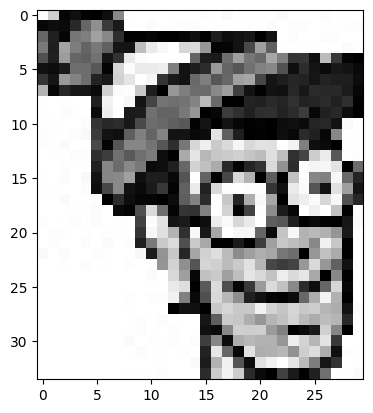

In [46]:
# Display the final result
waldo = Image.open('images/waldo.jpg')
waldo = waldo.convert('L')
plt.imshow(waldo, cmap="gray")